In [1]:
import pandas as pd
from collections import Counter
from transformers import DistilBertTokenizer
import seaborn as sns
import matplotlib.pyplot as pltimport, nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
import matplotlib.pyplot as plt
nltk.download('punkt')
nltk.download('stopwords')


/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.25.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
[nltk_data] Downloading package punkt to /home/ubuntu/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/ubuntu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
train = pd.read_csv("train_dataset_1.csv")
test = pd.read_csv("test_dataset_1.csv")
validation = pd.read_csv("validation_dataset_1.csv")
df = pd.concat([train, test, validation])

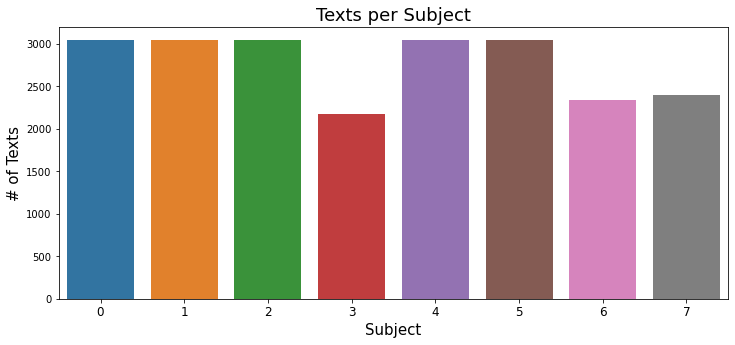

In [3]:
# Distribution of classes
subject_count = df['label'].value_counts()
subjects = subject_count.index
subject_count
fig = plt.figure(figsize= (12, 5))
ax = fig.add_subplot(111)
sns.barplot(x = subject_count.index, y = subject_count )
plt.xlabel('Subject', size = 15)
plt.ylabel("# of Texts", size= 15)
plt.xticks(size = 12)
plt.title("Texts per Subject" , size = 18)
plt.show()

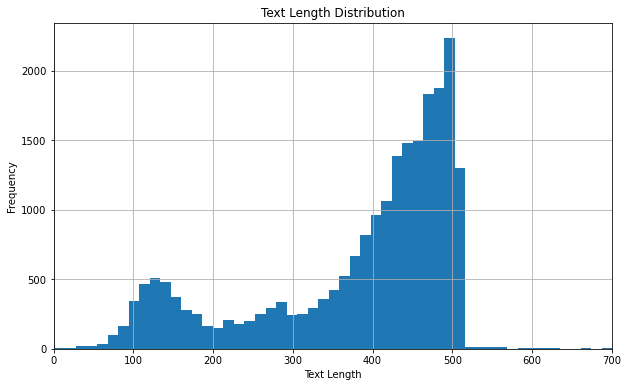

In [9]:
# Distrubtion of text length
df['text_length'] = df['text'].apply(len)
plt.figure(figsize=(10, 6))
plt.hist(df['text_length'], bins=200)
plt.title('Text Length Distribution')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.xlim((0,700))
plt.grid(True)
plt.show()

           frequency
one             7050
like            4669
example         4322
going           4179
let             3794
important       3753
right           3680
two             3274
also            3228
different       2683
would           2618
could           2601
another         2600
well            2486
way             2423
see             2403
help            2309
make            2289
use             2244
get             2214


<Figure size 720x432 with 0 Axes>

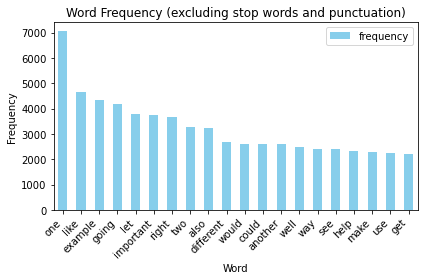

In [5]:
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
custom_punctuation = set(['.', ',', ';', ':', '!', '?', '-', '_', '(', ')', '[', ']', '{', '}', '<', '>', '/', '\\', '|', "'", '"', '`', '~', '@', '#', '$', '%', '^', '&', '*', '+', '=', '\n'])

def preprocess_text(text):
    # Remove stop words using NLTK
    stop_words = set(stopwords.words('english'))
    tokens = nltk.word_tokenize(text)
    tokens = [token for token in tokens if token.lower() not in stop_words and token not in custom_punctuation]
    return tokens

def show_word_frequency(data_frame):
    all_text = ' '.join(data_frame['text'])
    tokens = preprocess_text(all_text)
    tokens = [token.lower() for token in tokens]
    input_ids = tokenizer.convert_tokens_to_ids(tokens)
    tokens = tokenizer.convert_ids_to_tokens(input_ids)
    special_tokens = set(tokenizer.all_special_tokens)
    tokens = [token for token in tokens if token not in special_tokens]
    token_freq = Counter(tokens)
    token_freq_df = pd.DataFrame.from_dict(token_freq, orient='index', columns=['frequency'])
    token_freq_df = token_freq_df.sort_values(by='frequency', ascending=False)
    print(token_freq_df.head(20))
    plt.figure(figsize=(10, 6))
    token_freq_df.head(20).plot(kind='bar', color='skyblue')
    plt.title('Word Frequency (excluding stop words and punctuation)')
    plt.xlabel('Word')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

show_word_frequency(df)